# Assignment 1: Pandas, Probabilities and other ML basics

## What you will learn

* Setting up the environment for rest of the course
* Hands on with Pandas library and Matplotlib
* Inferencing the data
* Bayes's theorem

## Setup

* Download [Anaconda Python 3.6](https://www.anaconda.com/download/) for consistent environment.
* If you use pip environment then make sure your code is compatible with versions of libraries provided withing Anaconda's Python 3.6 distribution.
* In the first tutorial, everyone did a survey, for this assignment we will utilize survey results as the dataset to perform various inferences.

## Submission
* Do not change any variable/function names.
* Just add your own code and don't change existing code
* Save this file and rename it to be **studentid_lastname.ipynb** (student id (underscore) last name.ipynb)
* Submit only single .ipynb file to learn (no zip or .py files or anything else)
* If you happen to use any external library not included in Anaconda (mention in **Submission Notes** section below)

## Submission Notes
(Please write any notes here that you think I should know during marking)

## Tasks [100 marks]

### [Already Done] Task 1: Read the dataset [10 marks] 
You can use `read_csv` function from `pandas` library for reading CSV file.

You can show the data by simply writing the variable.

In [2]:
import pandas as pd

data = pd.read_csv('./survey_data.csv')

# better naming
data.columns = ['time', 'dept', 'degree_type', 'lang', 'movie']

# Don't need time axis
data = data.drop('time', axis=1)

# I missed Mechatronics people..oops!
data.dept[ data.dept == 'Other']= 'Mechatronics'

# Only two PhD. combine them into same category
data.degree_type[ data.degree_type == 'Graduate (PhD.)']= 'Graduate'
data.degree_type[ data.degree_type == 'Graduate (Masters)'] = 'Graduate'

# Show the data
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows', 10)

# show the DataFrame
data

,dept,degree_type,lang,movie
0,SYD,Graduate,Python,Back to the Future Franchise
1,ECE,Graduate,C/C++,The Lord of the Rings (Trilogy)
2,SYD,Undergrad,Python,Other
3,SYD,Undergrad,Python,Harry Potter Franchise
4,SYD,Undergrad,Python,Harry Potter Franchise
...,...,...,...,...
48,Mechatronics,Undergrad,C/C++,The Lord of the Rings (Trilogy)
49,SYD,Graduate,Matlab,Harry Potter Franchise
50,SYD,Graduate,C/C++,Star Wars Franchise
51,Mechatronics,Undergrad,Python,Star Wars Franchise


## Task 2: Fill in three functions below [40 marks]

Plotting function `plot_stats()` is coded for the convenience.

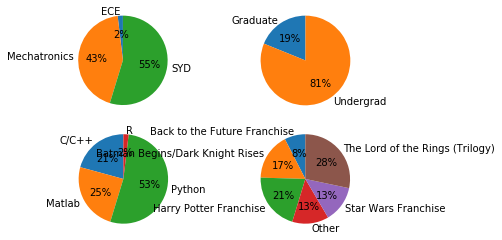

In [10]:
import matplotlib.pyplot as plt
# to draw plots in the notebook itself
%matplotlib inline

def dept_stats(data):
    """
    Input: `data` DataFrame object
    Returns: dictionary object with keys as unique dept and their total count
    """
    # It should return something like this:
    #{
    #    'SYD': 34,
    #    'ECE': 12,
    #    'Mechatronics': 32
    #}
    return get_stats('dept', data)
    

def degree_type_stat(data):
    """
    Input: data
    Returns: dictionary object with key as degree type and their total count
    """
    return get_stats('degree_type', data)

def lang_stat(data):
    """
    Input: data
    Returns: dictionary object with key as language and their total count
    """
    return get_stats('lang', data)

def movie_stat(data):
    """
    Input: data
    Returns: dictionary object with key as movie name and their total count
    """
    return get_stats('movie', data)

def get_stats(criteria, data):
    """
    input: criteria is a string representing column to group by,
        data is a dataframe
    output: dictionary object with keys as unique dept and their total count
    """
    groups = data.groupby(criteria).groups

    stats = {}

    for group, series in groups.items():
        stats[group] = series.size

    return stats

def plot_pie(dictd):
    # Draw the pie chart
    plt.pie(dictd.values(), labels=dictd.keys(), autopct='%.0f%%', startangle=90)
    plt.axis('equal')
    
def plot_stats():    
    
    plt.subplot(2, 2, 1)
    plot_pie(dept_stats(data))
    
    plt.subplot(2, 2, 2)
    plot_pie(degree_type_stat(data))
    
    plt.subplot(2, 2, 3)
    plot_pie(lang_stat(data))
    
    
    plt.subplot(2, 2, 4)
    plot_pie(movie_stat(data))

plot_stats()

## Task 3:  Bayesian Inference [50 Marks]

Recall, according to Bayes's theorem:


$P(A|B) = \frac{P(B|A)*P(A)}{P(B)}$


Now, we need to find:

What is probability that randomly selected student is `Graduate` student if she\he likes `C/C++` language and `Star Wars` movie? Let's say condition of anyone liking `C/C++` and `Star Wars` is `C` then we need to find:

$P(X=Graduate|C)$ 

which can be calculated by finding fraction of graduate who satisfy condition $C$.

But in this section we will try to verify Bayes's theorem which states:

$P(X=Graduate|C) = \frac{P(C|X=Graduate)*P(X=Graduate)}{P(C)}$

You can now find:
* $P(X=Graduate)$: Just calculate total number of graduates in the class (recall this prior prob)
* $P(C|X=Graduate)$: Fraction of `Star Wars` and `C\C++` fan who are graduate (recall this is likelihood)
* $P(C)$: Fraction of total people who like `Star Wars` and `C/C++`

Now find, probability of following statements?

1. What is probability that random student is undergrad?
2. What is the probability that random student likes C\C++ and not a Star War fan?
3. What is the probability that **undergrad** student likes C\C++ and not a Star War fan?
4. What is the probability that a given student who likes C\C++ but not a Star War fan is an undergrad student? (Apply Bayes theorem on answers from 1., 2. and 3.)
5. Further verify 4. by manually finding it (not using Bayes's theorem)


In [11]:
# populate this array to values corresponding to above 5 questions
# do not change the name of the variable
probs = [None, None, None, None, None]

def undergrad_obv(data):
    """
    input: data
    output: int
    """
    return degree_type_stat(data)["Undergrad"]

def not_fan_obv(data, return_frame = False):
    """
    input: data
    output: int by default, dataframe if return_frame set to True
    """
    filtered_data =  data[(data.lang == "C/C++") & \
                          (data.movie != "Star Wars Franchise")]
    
    if (return_frame):
        return filtered_data
    else:
        return len(filtered_data)

def undergrad_not_fan_obv(data):
    """
    input: data
    output: int
    """
    filtered_data = data[(data.degree_type == "Undergrad") & \
                         (data.lang == "C/C++") & \
                         (data.movie != "Star Wars Franchise")]
    
    return len(filtered_data)

sample_size = len(data)

probs[0] = undergrad_obv(data) / sample_size # 1.
probs[1] = not_fan_obv(data) / sample_size # 2.
probs[2] = undergrad_not_fan_obv(data) / undergrad_obv(data) # 3.
probs[3] = (probs[2] * probs[0]) / probs[1] # 4.

# manual method for 4.

new_data = not_fan_obv(data, True)
new_sample_size = not_fan_obv(data)
new_filtered_data = new_data[(data.degree_type == "Undergrad")]

probs[4] = len(new_filtered_data) / new_sample_size # 5.

probs

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:44: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


[0.8113207547169812, 0.18867924528301888, 0.20930232558139536, 0.9, 0.9]

## Task 4: Bonus (5 extra marks only if loose above)

**Note:** Max you can score is still 100. But if you loose something above you can compensate here.

Do any interesting inferencing with the data on hand.

Perhaps find some interesting patterns? or plot some interesting visualizations.

For example: People who like C\C++ are likely LOTR fans? (just an example)

This is just for you to play with the data. There is no marking scheme for this question. If I like your work, you may get good in this section.

In [5]:
# Do anything intresting this data here
# visualization
# explore some patterns
# etc